In [24]:
using DynamicalSystems
using PyPlot
using NLsolve

In [25]:
function r3bpproblem(u,p,t)
    mu = p[1]
    du1 = u[3]+u[2]
    du2 = u[4]-u[1]
    du3=u[4]-(1-mu)*(u[1]+mu)/((u[1]+mu)^2+u[2]^2)^(3/2)-mu*(u[1]+mu-1)/((u[1]+mu-1)^2+u[2]^2)^(3/2)
    du4=-u[3]-(1-mu)*u[2]/((u[1]+mu)^2+u[2]^2)^(3/2)-mu*u[2]/((u[1]+mu-1)^2+u[2]^2)^(3/2)
    return SVector{4}(du1, du2, du3, du4)
end

r3bpproblem (generic function with 1 method)

In [26]:
p=[0.01]
u0 = [0.5-p[1], sqrt(3)/2, -sqrt(3)/2, 0.5-p[1]]
r3bp = ContinuousDynamicalSystem(r3bpproblem,u0,p)

4-dimensional continuous dynamical system
 state:       [0.49, 0.866025, -0.866025, 0.49]
 rule f:      r3bpproblem
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.01]

In [27]:
E=-3/2+1/2*p[1]-1/2*p[1]^2-0.1

-1.5950500000000003

In [28]:
function nls(func, params...; ini = [0.0])
    if typeof(ini) <: Number
        r = nlsolve((vout,vin)->vout[1]=func(vin[1],params...), [ini])
        v = r.zero[1]
    else
        r = nlsolve((vout,vin)->vout .= func(vin,params...), ini)
        v = r.zero
    end
    return v, r.f_converged
end

nls (generic function with 1 method)

In [35]:
K=10
x=[(0.5-p[1])+i/1000 for i in -K:K]
#3^{-1/3} =.693361274=がL点

21-element Vector{Float64}:
 0.48
 0.481
 0.482
 0.483
 0.484
 0.485
 0.486
 0.487
 0.488
 0.489
 0.49
 0.491
 0.492
 0.493
 0.494
 0.495
 0.496
 0.497
 0.498
 0.499
 0.5

In [36]:
f(P, X)=(sqrt(3)/2)^2/2+1/2*P^2-(sqrt(3)/2)^2-X*P-(1-p[1])/((X+p[1])^2+(sqrt(3)/2)^2)^(1/2)-p[1]/((X+p[1]-1)^2+(sqrt(3)/2)^2)^(1/2)-E

f (generic function with 1 method)

In [37]:
XX=zeros(Float64, K)
for i in 1:K
    SX=nls(f, x[i],ini=0.5+p[1])
    XX[i]=SX[1]
end

In [ ]:
plane = (2, sqrt(3)/2)
d=100
fig = figure()
#xlim(0.5-p[1]-d, 0.5-p[1]+d)
#ylim(-sqrt(3)/2-d, -sqrt(3)/2+d)


ps=[]
for i in 1:K-1
    u0=[x[i],sqrt(3)/2,-sqrt(3)/2,XX[i]]
    psos = poincaresos(r3bp, plane, 1000000.0; u0 = u0)
    scatter(psos[:, 1], psos[:, 3], s = 2.0)
    scatter(0.5-p[1], -sqrt(3)/2, s = 50.0)
end
xlabel("\$q_1\$"); ylabel("\$p_1\$")
fig.tight_layout(pad=0.3);

In [33]:
x

21-element Vector{Float64}:
 0.489
 0.4891
 0.48919999999999997
 0.4893
 0.4894
 0.4895
 0.4896
 0.48969999999999997
 0.4898
 0.4899
 0.49
 0.4901
 0.49019999999999997
 0.4903
 0.4904
 0.4905
 0.4906
 0.49069999999999997
 0.4908
 0.4909
 0.491

In [12]:
tmax = 10
tr = trajectory(r3bp , tmax)

4-dimensional Dataset{Float64} with 1001 points
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 ⋮                           
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499
 0.499  0.866025  -0.866025  0.499

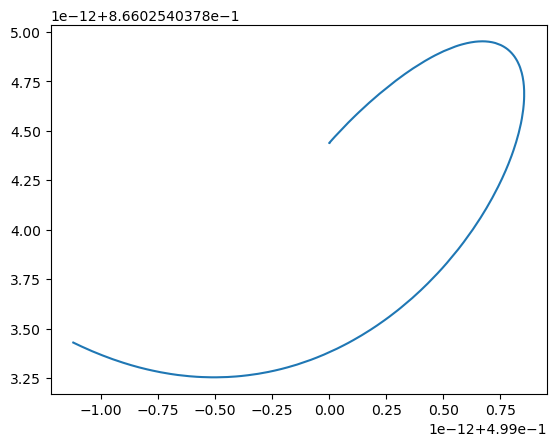

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa6963c1280>

In [13]:

# trをx成分とy成分にわける
tr_x = tr[:, 1]
tr_y = tr[:, 2]
# plotする
plot(tr_x, tr_y, label="")

In [14]:
XX

100-element Vector{Float64}:
 0.93629645803614
 0.9363948189177936
 0.9364931959736175
 0.9365915892097983
 0.9366899986325139
 0.9367884242479433
 0.9368868660622612
 0.9369853240816395
 0.9370837983122445
 0.9371822887602428
 0.9372807954317975
 0.9373793183330652
 0.9374778574701993
 ⋮
 0.9450148014347576
 0.945114608960427
 0.9452144331919812
 0.9453142741353165
 0.9454141317963208
 0.9455140061808837
 0.9456138972948862
 0.9457138051442094
 0.9458137297347305
 0.9459136710723217
 0.9460136291628534
 0.9461136040121916

In [15]:
x

201-element Vector{Float64}:
 0.489
 0.4891
 0.4892
 0.4893
 0.4894
 0.4895
 0.4896
 0.4897
 0.4898
 0.4899
 0.49
 0.4901
 0.4902
 ⋮
 0.5079
 0.508
 0.5081
 0.5082
 0.5083
 0.5084
 0.5085
 0.5086
 0.5087
 0.5088
 0.5089
 0.509